In [2]:
#cargamos las bibliotecas a utilizar y asignamos nombres cortos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df0 = pd.read_csv('datos.txt', skiprows=1, sep='\s+', header=None, names=["FECHA","PRECIP", "EVAP","TMAX", "TMIN"])
sns.set(rc={'figure.figsize':(12,8.27)})

In [4]:
df0.head()

,FECHA,PRECIP,EVAP,TMAX,TMIN
0,17/12/1967,0.0,Nulo,19.0,Nulo
1,18/12/1967,0.0,2,21.0,6
2,19/12/1967,0.0,2.7,20.0,9
3,20/12/1967,0.0,7.7,23.0,12
4,21/12/1967,0.0,3.4,21.0,11


In [5]:
#le damos estructura a los datos
df = pd.DataFrame(df0)

In [6]:
#vemos los tipos de datos asignados por pandas
df.dtypes

FECHA      object
PRECIP    float64
EVAP       object
TMAX      float64
TMIN       object
dtype: object

In [7]:
df['EVAP'] = df['EVAP'].str.replace('Nulo','NaN').astype(np.float64)
df['TMIN'] = df['TMIN'].str.replace('Nulo','NaN').astype(np.float64)
df['FECHA'] = pd.to_datetime(df.apply(lambda x: x['FECHA'], 1), dayfirst=True)

In [8]:
df.dtypes

FECHA     datetime64[ns]
PRECIP           float64
EVAP             float64
TMAX             float64
TMIN             float64
dtype: object

In [9]:
df.mean()

PRECIP     0.310963
EVAP       5.348794
TMAX      29.438503
TMIN      11.381452
dtype: float64

In [10]:
df.std()

PRECIP    2.239066
EVAP      2.696679
TMAX      6.348373
TMIN      5.678299
dtype: float64

In [11]:
df.median()

PRECIP     0.0
EVAP       5.1
TMAX      29.0
TMIN      10.0
dtype: float64

In [12]:
df.max()

FECHA     1969-05-27 00:00:00
PRECIP                     27
EVAP                     11.8
TMAX                     41.5
TMIN                       24
dtype: object

In [13]:
df.min()

FECHA     1967-12-17 00:00:00
PRECIP                      0
EVAP                      0.1
TMAX                       15
TMIN                      0.5
dtype: object

In [14]:
df.describe()

,PRECIP,EVAP,TMAX,TMIN
count,374.000000,373.000000,374.000000,372.000000
mean,0.310963,5.348794,29.438503,11.381452
std,2.239066,2.696679,6.348373,5.678299
min,0.000000,0.100000,15.000000,0.500000
25%,0.000000,3.000000,24.000000,7.000000
50%,0.000000,5.100000,29.000000,10.000000
75%,0.000000,7.400000,34.375000,14.000000
max,27.000000,11.800000,41.500000,24.000000


In [15]:
df['week_start'] = df['FECHA'] + pd.DateOffset(weeks=1)

In [16]:
df.shape

(374, 6)

In [17]:
df.index

RangeIndex(start=0, stop=374, step=1)

In [18]:
df.count()

FECHA         374
PRECIP        374
EVAP          373
TMAX          374
TMIN          372
week_start    374
dtype: int64

In [19]:
df.corr()

,PRECIP,EVAP,TMAX,TMIN
PRECIP,1.000000,-0.101278,-0.128734,-0.024393
EVAP,-0.101278,1.000000,0.675039,0.406255
TMAX,-0.128734,0.675039,1.000000,0.783233
TMIN,-0.024393,0.406255,0.783233,1.000000


In [20]:
df.PRECIP.max()

27.0

In [21]:
df['DIA'] = df['FECHA'].dt.day
df.head()

df['MES'] = df['FECHA'].dt.month
df.head()

df['YEAR'] = df['FECHA'].dt.year
df.head()

,FECHA,PRECIP,EVAP,TMAX,TMIN,week_start,DIA,MES,YEAR
0,1967-12-17,0.0,NaN,19.0,NaN,1967-12-24,17,12,1967
1,1967-12-18,0.0,2.0,21.0,6.0,1967-12-25,18,12,1967
2,1967-12-19,0.0,2.7,20.0,9.0,1967-12-26,19,12,1967
3,1967-12-20,0.0,7.7,23.0,12.0,1967-12-27,20,12,1967
4,1967-12-21,0.0,3.4,21.0,11.0,1967-12-28,21,12,1967


In [22]:
df.dtypes

FECHA         datetime64[ns]
PRECIP               float64
EVAP                 float64
TMAX                 float64
TMIN                 float64
week_start    datetime64[ns]
DIA                    int64
MES                    int64
YEAR                   int64
dtype: object

In [23]:
df_ENE=df[df.MES==1]
df_FEB=df[df.MES==2]
df_MAR=df[df.MES==3]
df_ABR=df[df.MES==4]
df_MAY=df[df.MES==5]
df_JUN=df[df.MES==6]
df_JUL=df[df.MES==7]
df_AGO=df[df.MES==8]
df_SEP=df[df.MES==9]
df_OCT=df[df.MES==10]
df_NOV=df[df.MES==11]
df_DIC=df[df.MES==12]

In [24]:
#Precipitaciones por mes
PRECIP_ENE=df_ENE.PRECIP.sum()
print("ENE = ",PRECIP_ENE)

PRECIP_FEB=df_FEB.PRECIP.sum()
print("FEB = ",PRECIP_FEB)

PRECIP_MAR=df_MAR.PRECIP.sum()
print("MAR = ",PRECIP_MAR)

PRECIP_ABR=df_ABR.PRECIP.sum()
print("ABR = ",PRECIP_ABR)

PRECIP_MAY=df_MAY.PRECIP.sum()
print("MAY = ",PRECIP_MAY)

PRECIP_JUN=df_JUN.PRECIP.sum()
print("JUN = ",PRECIP_JUN)

PRECIP_JUL=df_JUL.PRECIP.sum()
print("JUL = ",PRECIP_JUL)

PRECIP_AGO=df_AGO.PRECIP.sum()
print("AGO = ",PRECIP_AGO)

PRECIP_SEP=df_SEP.PRECIP.sum()
print("SEP = ",PRECIP_SEP)

PRECIP_OCT=df_OCT.PRECIP.sum()
print("OCT = ",PRECIP_OCT)

PRECIP_NOV=df_NOV.PRECIP.sum()
print("NOV = ",PRECIP_NOV)

PRECIP_DIC=df_DIC.PRECIP.sum()
print("DIC = ",PRECIP_DIC)

ENE =  18.5
FEB =  88.4
MAR =  0.0
ABR =  4.0
MAY =  0.0
JUN =  0.0
JUL =  0.0
AGO =  0.0
SEP =  3.0
OCT =  0.0
NOV =  0.0
DIC =  2.4


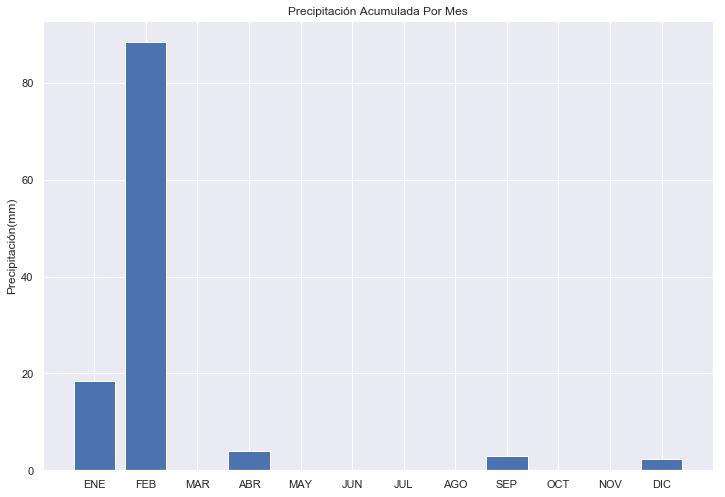

In [25]:
x = ('ENE', 'FEB', 'MAR', 'ABR', 'MAY', 'JUN', 'JUL','AGO','SEP','OCT','NOV','DIC') 
y=np.arange(len(x))
PRECIP= [PRECIP_ENE,PRECIP_FEB,PRECIP_MAR,PRECIP_ABR,PRECIP_MAY,PRECIP_JUN,PRECIP_JUL,PRECIP_AGO,PRECIP_SEP,PRECIP_OCT,PRECIP_NOV,PRECIP_DIC]
 
plt.bar(y, PRECIP, align='center')
plt.xticks(y, x)
plt.ylabel('Precipitación(mm)')
plt.title('Precipitación Acumulada Por Mes')
plt.show()

In [26]:
#Temperaturas por mes(max)
TMAX_ENE=df_ENE.TMAX.mean()
print("ENE = ",TMAX_ENE)

TMAX_FEB=df_FEB.TMAX.mean()
print("FEB = ",TMAX_FEB)

TMAX_MAR=df_MAR.TMAX.mean()
print("MAR = ",TMAX_MAR)

TMAX_ABR=df_ABR.TMAX.mean()
print("ABR = ",TMAX_ABR)

TMAX_MAY=df_MAY.TMAX.mean()
print("MAY = ",TMAX_MAY)

TMAX_JUN=df_JUN.TMAX.mean()
print("JUN = ",TMAX_JUN)

TMAX_JUL=df_JUL.TMAX.mean()
print("JUL = ",TMAX_JUL)

TMAX_AGO=df_AGO.TMAX.mean()
print("AGO = ",TMAX_AGO)

TMAX_SEP=df_SEP.TMAX.mean()
print("SEP = ",TMAX_SEP)

TMAX_OCT=df_OCT.TMAX.mean()
print("OCT = ",TMAX_OCT)

TMAX_NOV=df_NOV.TMAX.mean()
print("NOV = ",TMAX_NOV)

TMAX_DIC=df_DIC.TMAX.mean()
print("DIC = ",TMAX_DIC)

ENE =  24.225806451612904
FEB =  24.587719298245613
MAR =  25.774193548387096
ABR =  31.775
MAY =  33.66379310344828
JUN =  nan
JUL =  nan
AGO =  nan
SEP =  39.43333333333333
OCT =  38.66129032258065
NOV =  nan
DIC =  23.711111111111112


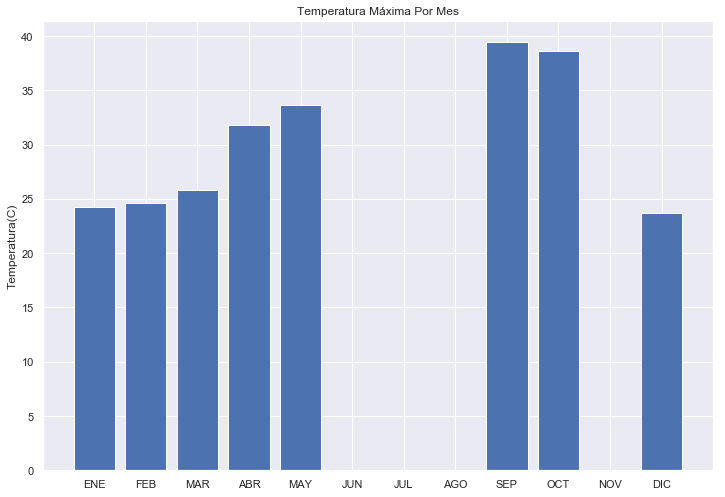

In [27]:
x = ('ENE', 'FEB', 'MAR', 'ABR', 'MAY', 'JUN', 'JUL','AGO','SEP','OCT','NOV','DIC') 
y=np.arange(len(x))
PRECIP= [TMAX_ENE,TMAX_FEB,TMAX_MAR,TMAX_ABR,TMAX_MAY,TMAX_JUN,TMAX_JUL,TMAX_AGO,TMAX_SEP,TMAX_OCT,TMAX_NOV,TMAX_DIC]
 
plt.bar(y, PRECIP, align='center')
plt.xticks(y, x)
plt.ylabel('Temperatura(C)')
plt.title('Temperatura Máxima Por Mes')
plt.show()

In [28]:
#Temperaturas por mes(max)
TMIN_ENE=df_ENE.TMIN.mean()
print("ENE = ",TMIN_ENE)

TMIN_FEB=df_FEB.TMIN.mean()
print("FEB = ",TMIN_FEB)

TMIN_MAR=df_MAR.TMIN.mean()
print("MAR = ",TMIN_MAR)

TMIN_ABR=df_ABR.TMIN.mean()
print("ABR = ",TMIN_ABR)

TMIN_MAY=df_MAY.TMIN.mean()
print("MAY = ",TMIN_MAY)

TMIN_JUN=df_JUN.TMIN.mean()
print("JUN = ",TMIN_JUN)

TMIN_JUL=df_JUL.TMIN.mean()
print("JUL = ",TMIN_JUL)

TMIN_AGO=df_AGO.TMIN.mean()
print("AGO = ",TMIN_AGO)

TMIN_SEP=df_SEP.TMIN.mean()
print("SEP = ",TMIN_SEP)

TMIN_OCT=df_OCT.TMIN.mean()
print("OCT = ",TMIN_OCT)

TMIN_NOV=df_NOV.TMIN.mean()
print("NOV = ",TMIN_NOV)

TMIN_DIC=df_DIC.TMIN.mean()
print("DIC = ",TMIN_DIC)

ENE =  8.546774193548387
FEB =  8.719298245614034
MAR =  5.661290322580645
ABR =  10.391666666666667
MAY =  13.336206896551724
JUN =  nan
JUL =  nan
AGO =  nan
SEP =  22.5
OCT =  21.56451612903226
NOV =  nan
DIC =  6.767441860465116


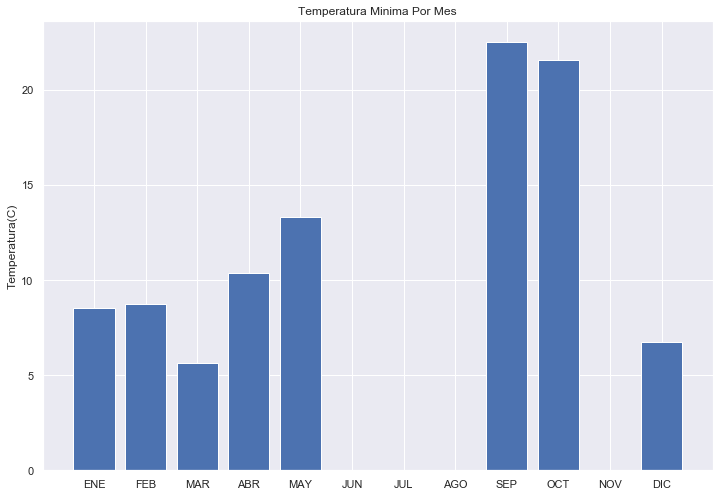

In [29]:
x = ('ENE', 'FEB', 'MAR', 'ABR', 'MAY', 'JUN', 'JUL','AGO','SEP','OCT','NOV','DIC') 
y=np.arange(len(x))
PRECIP= [TMIN_ENE,TMIN_FEB,TMIN_MAR,TMIN_ABR,TMIN_MAY,TMIN_JUN,TMIN_JUL,TMIN_AGO,TMIN_SEP,TMIN_OCT,TMIN_NOV,TMIN_DIC]
 
plt.bar(y, PRECIP, align='center')
plt.xticks(y, x)
plt.ylabel('Temperatura(C)')
plt.title('Temperatura Minima Por Mes')
plt.show()

In [30]:
init = 1967
YEARS = [init + i for i in range(0, 3)]
PYEAR = [ df[df.YEAR==(init + i)].PRECIP.sum() for i in range(0, 3)]

In [31]:
d = {'YEAR': YEARS, 'PRECIPITACIÓN_TOTAL': PYEAR}
df2 = pd.DataFrame(data=d)
df2.head()

,YEAR,PRECIPITACIÓN_TOTAL
0,1967,0.0
1,1968,60.4
2,1969,55.9


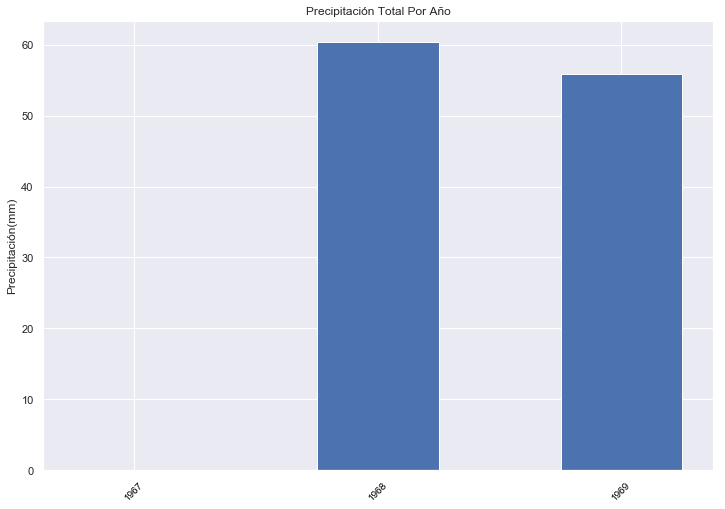

In [32]:
fecha = YEARS
N = np.arange(len(fecha))
PRECIPIT= PYEAR
 
plt.bar(N, PRECIPIT,  width=0.5,align='center')
plt.xticks(N, fecha, size = 'small', color = 'black', rotation = 45)
plt.ylabel('Precipitación(mm)')
plt.title('Precipitación Total Por Año')
plt.show()

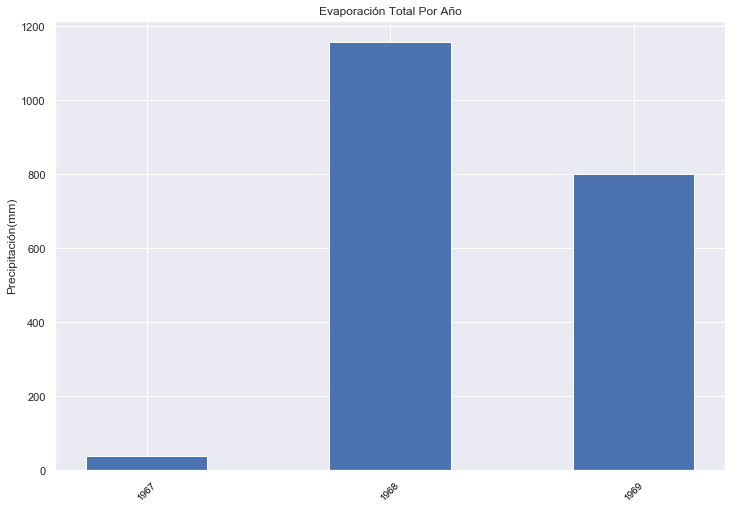

In [33]:
init = 1967
YEARS = [init + i for i in range(0, 3)]
EYEAR = [ df[df.YEAR==(init + i)].EVAP.sum() for i in range(0, 3)]

d = {'YEAR': YEARS, 'EVAPORACION_TOTAL': EYEAR}
df2 = pd.DataFrame(data=d)
df2.head()

fecha = YEARS
N = np.arange(len(fecha))
PRECIPIT= PYEAR
 
plt.bar(N, EYEAR,  width=0.5,align='center')
plt.xticks(N, fecha, size = 'small', color = 'BLACK', rotation=45)
plt.ylabel('Precipitación(mm)')
plt.title('Evaporación Total Por Año')
plt.show()

In [34]:
#Precipitaciones por mes
PRECIP_ENE=df_ENE.PRECIP.mean()
print("ENE = ",PRECIP_ENE)

PRECIP_FEB=df_FEB.PRECIP.mean()
print("FEB = ",PRECIP_FEB)

PRECIP_MAR=df_MAR.PRECIP.mean()
print("MAR = ",PRECIP_MAR)

PRECIP_ABR=df_ABR.PRECIP.mean()
print("ABR = ",PRECIP_ABR)

PRECIP_MAY=df_MAY.PRECIP.mean()
print("MAY = ",PRECIP_MAY)

PRECIP_JUN=df_JUN.PRECIP.mean()
print("JUN = ",PRECIP_JUN)

PRECIP_JUL=df_JUL.PRECIP.mean()
print("JUL = ",PRECIP_JUL)

PRECIP_AGO=df_AGO.PRECIP.mean()
print("AGO = ",PRECIP_AGO)

PRECIP_SEP=df_SEP.PRECIP.mean()
print("SEP = ",PRECIP_SEP)

PRECIP_OCT=df_OCT.PRECIP.mean()
print("OCT = ",PRECIP_OCT)

PRECIP_NOV=df_NOV.PRECIP.mean()
print("NOV = ",PRECIP_NOV)

PRECIP_DIC=df_DIC.PRECIP.mean()
print("DIC = ",PRECIP_DIC)

ENE =  0.29838709677419356
FEB =  1.5508771929824563
MAR =  0.0
ABR =  0.06666666666666667
MAY =  0.0
JUN =  nan
JUL =  nan
AGO =  nan
SEP =  0.1
OCT =  0.0
NOV =  nan
DIC =  0.05333333333333333


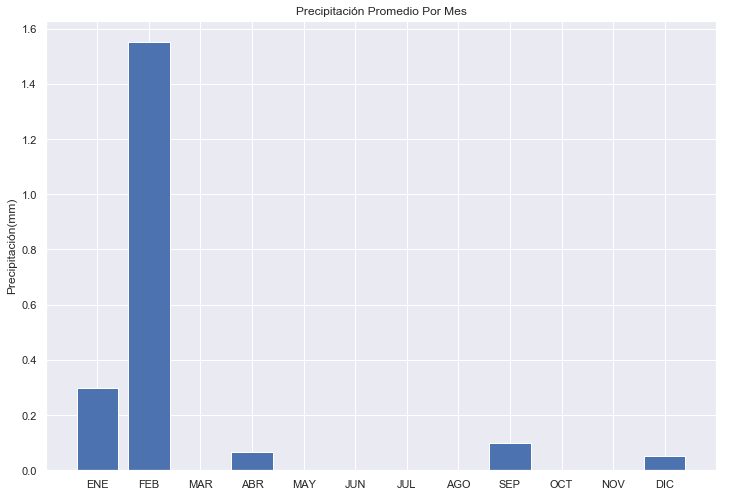

In [35]:
x = ('ENE', 'FEB', 'MAR', 'ABR', 'MAY', 'JUN', 'JUL','AGO','SEP','OCT','NOV','DIC') 
y=np.arange(len(x))
PRECIP= [PRECIP_ENE,PRECIP_FEB,PRECIP_MAR,PRECIP_ABR,PRECIP_MAY,PRECIP_JUN,PRECIP_JUL,PRECIP_AGO,PRECIP_SEP,PRECIP_OCT,PRECIP_NOV,PRECIP_DIC]
 
plt.bar(y, PRECIP, align='center')
plt.xticks(y, x)
plt.ylabel('Precipitación(mm)')
plt.title('Precipitación Promedio Por Mes')
plt.show()

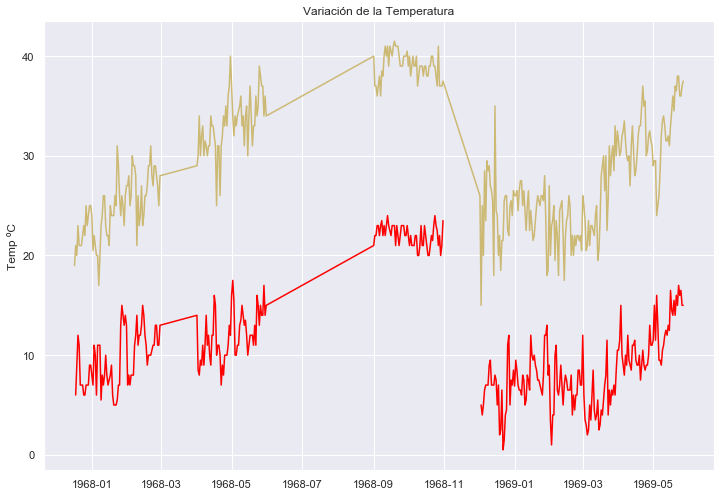

In [36]:
plt.plot_date(x=df.FECHA, y=df.TMAX, fmt="y")
plt.plot_date(x=df.FECHA, y=df.TMIN, fmt="RED")
plt.title("Variación de la Temperatura")
plt.ylabel("Temp ºC")
plt.grid(True)
plt.show()

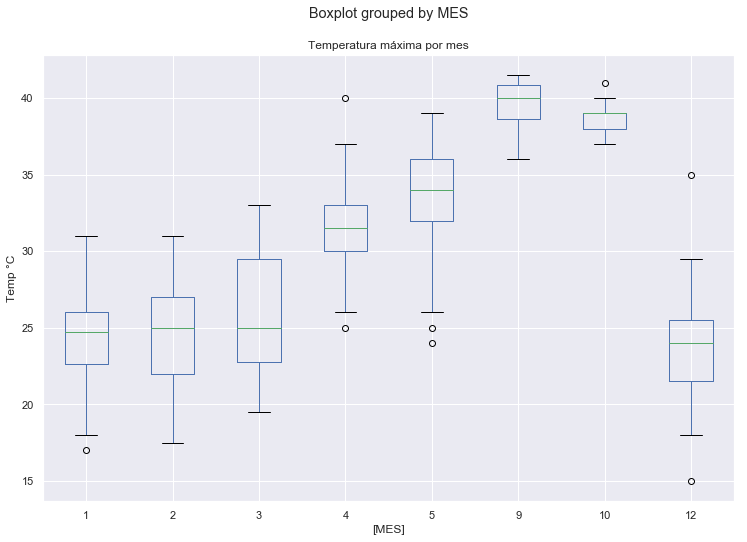

In [37]:
#ax = sns.boxplot(x="MES", y="TMAX", data=df)
#plt.title("Temperatura máxima por mes")
#plt.ylabel ("Temp °C")

df4=pd.DataFrame({"MES" : df.MES, "TMAX" : df.TMAX})
df4.boxplot(by="MES")
plt.title("Temperatura máxima por mes")
plt.ylabel ("Temp °C")
plt.show()

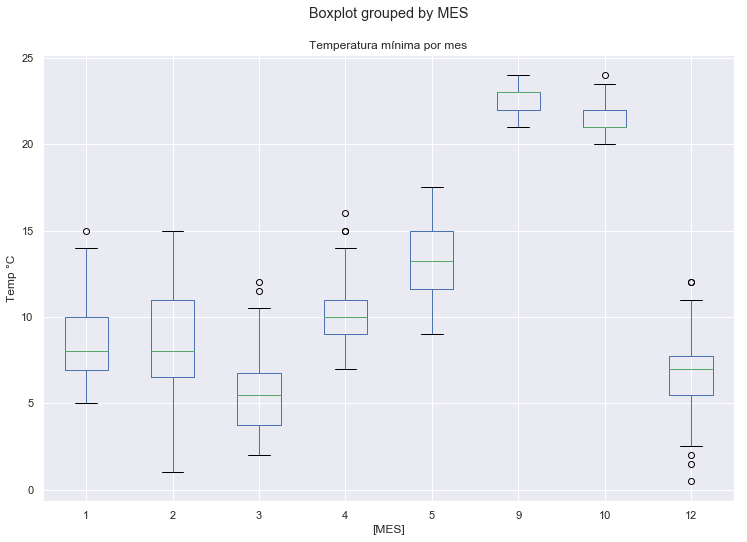

In [38]:
#ax = sns.boxplot(x="MES", y="TMIN", data=df)
#plt.title("Temperatura mínima por mes")
#plt.ylabel ("Temp °C")

df4=pd.DataFrame({"MES" : df.MES, "TMIN" : df.TMIN})
df4.boxplot(by="MES")
plt.title("Temperatura mínima por mes")
plt.ylabel ("Temp °C")
plt.show()

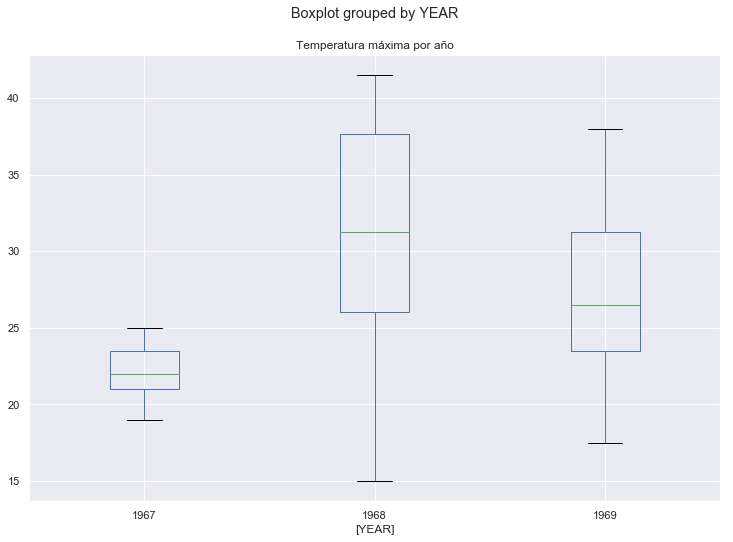

In [39]:
df4=pd.DataFrame({"YEAR" : df.YEAR, "TMAX" : df.TMAX})
df4.boxplot(by="YEAR")
plt.title("Temperatura máxima por año")
plt.show()

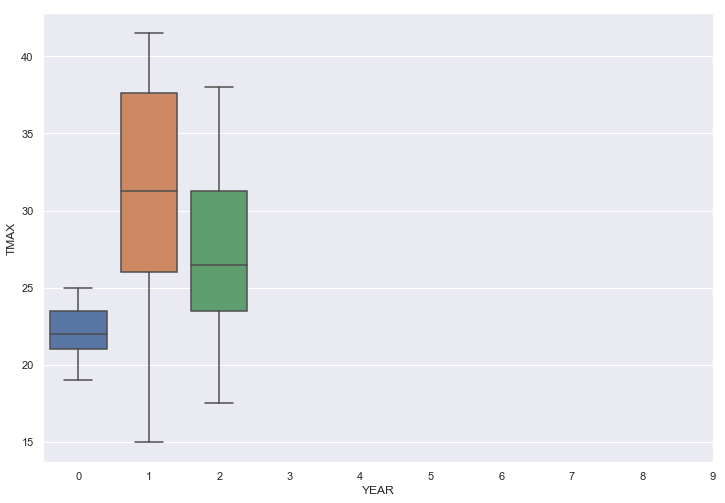

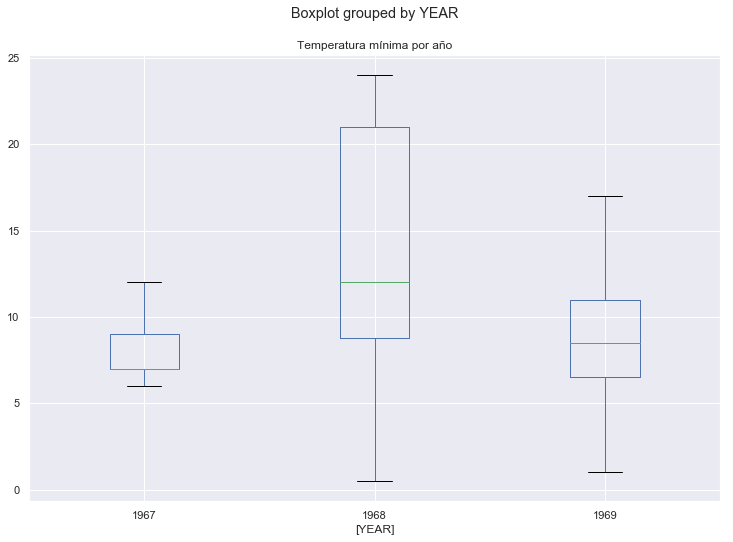

In [40]:
ax = sns.boxplot(x="YEAR", y="TMAX", data=df)
df4=pd.DataFrame({"YEAR" : df.YEAR, "TMIN" : df.TMIN})
df4.boxplot(by="YEAR")
ax.set_xticks(range(10))
ax.set_xticklabels(range(10))
plt.title("Temperatura mínima por año")
plt.show()

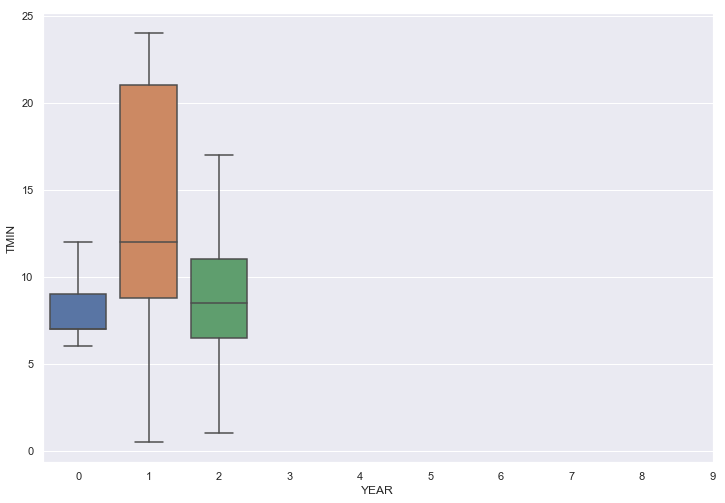

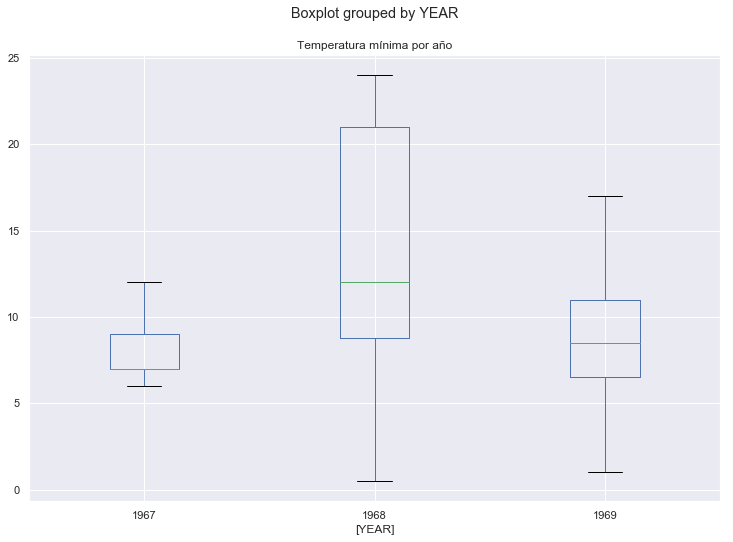

In [41]:
ax = sns.boxplot(x="YEAR", y="TMIN", data=df)
df4=pd.DataFrame({"YEAR" : df.YEAR, "TMIN" : df.TMIN})
df4.boxplot(by="YEAR")
ax.set_xticks(range(10))
ax.set_xticklabels(range(10))
plt.title("Temperatura mínima por año")
plt.show()

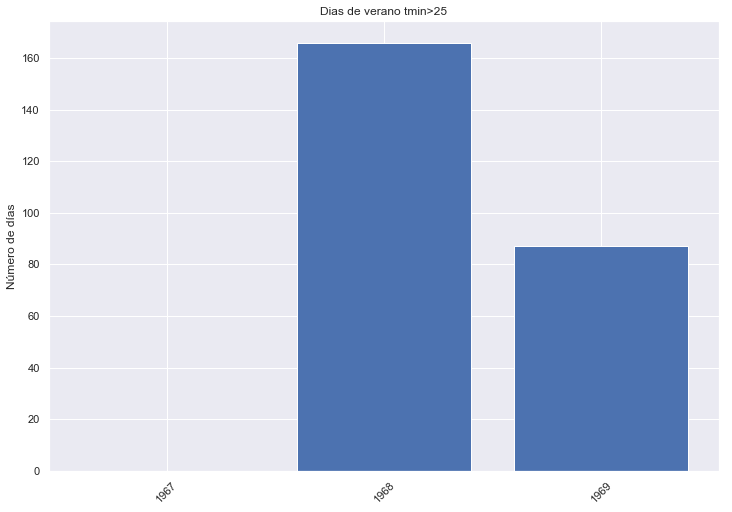

In [46]:
#Dias de verano
data1=[]
data2=[]
for i in range(0, 3):
    init=1967
    count=init + i
    j=df[df.YEAR==(1967+i)].TMAX
    ji=len([1 for i in j if i > 25])
    data1.append(count)
    data2.append(ji)
df3=pd.DataFrame({"YEAR" : data1, "DVer" : data2})

x=df3.YEAR
y=np.arange(len(x))
DV=df3.DVer

plt.bar(y, DV, align='center')
plt.xticks(y, x,rotation=45)
plt.ylabel('Número de días')
plt.title("Dias de verano tmin>25")
plt.show()

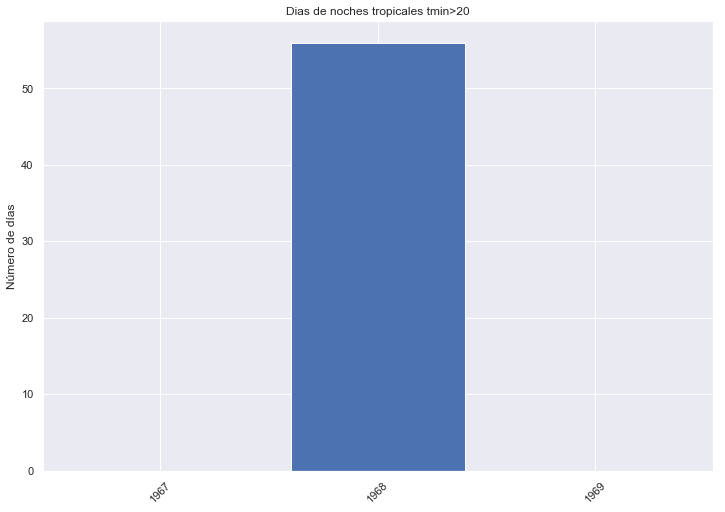

In [43]:
#Número de noches tropicales por año (TR: Tmin > 20ºC)
data1=[]
data2=[]
for i in range(0, 3):
    init=1967
    count=init + i
    j=df[df.YEAR==(1967+i)].TMIN
    ji=len([1 for i in j if i > 20])
    data1.append(count)
    data2.append(ji)
df3=pd.DataFrame({"YEAR" : data1,"TROP" : data2})

x=df3.YEAR
y=np.arange(len(x))
TP=df3.TROP

plt.bar(y, TP, align='center')
plt.xticks(y, x,rotation=45)
plt.ylabel('Número de días')
plt.title("Dias de noches tropicales tmin>20")
plt.show()

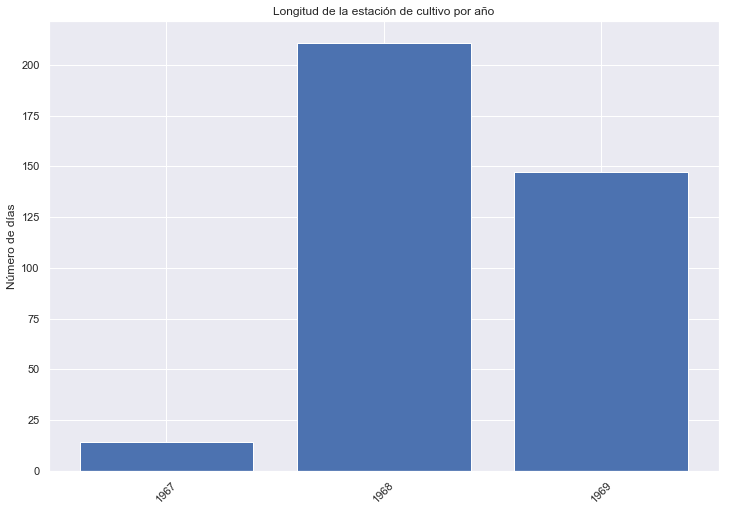

In [44]:
#Longitud de la estación de cultivo por año
data1=[]
data2=[]
for i in range(0, 3):
    init=1967
    count=init + i
    j=(df[df.YEAR==(1967+i)].TMIN + df[df.YEAR==(1967+i)].TMAX)/2
    ji=len([1 for i in j if i < 5])
    gi=len([1 for i in j if i > 5])
    ci=ji+gi
    j=g=0
    data1.append(count)
    data2.append(ci)
df3=pd.DataFrame({"YEAR" : data1, "CULT" : data2})

x=df3.YEAR
y=np.arange(len(x))
C=df3.CULT

plt.bar(y, C, align='center')
plt.xticks(y, x,rotation=45)
plt.ylabel('Número de días')
plt.title("Longitud de la estación de cultivo por año")
plt.show()

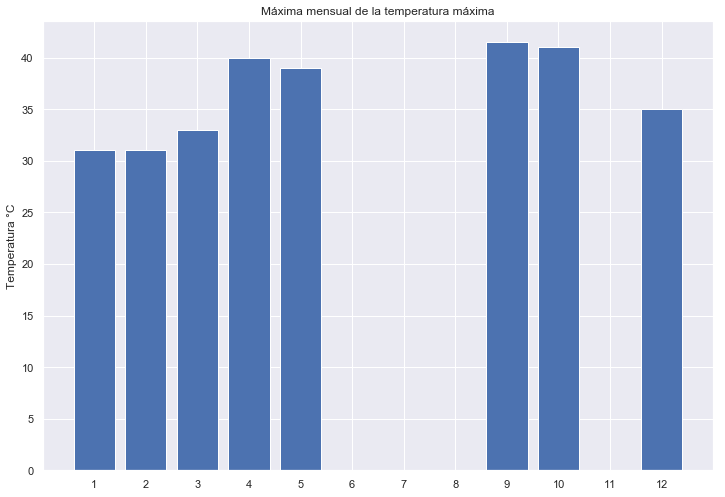

In [45]:
#TXx: La máxima mensual de la temperatura máxima, max(Tmax).
data1=[]
data2=[]
for i in range(0, 12):
    init=1
    count=init + i 
    j=df[df.MES==(init+i)].TMAX.max()
    data1.append(count)
    data2.append(j)
df3=pd.DataFrame({"MES" : data1, "maxTMAX" : data2})

x=df3.MES
y=np.arange(len(x))
Tmax=df3.maxTMAX

plt.bar(y, Tmax, align='center')
plt.xticks(y, x)
plt.ylabel('Temperatura °C')
plt.title("Máxima mensual de la temperatura máxima")
plt.show()

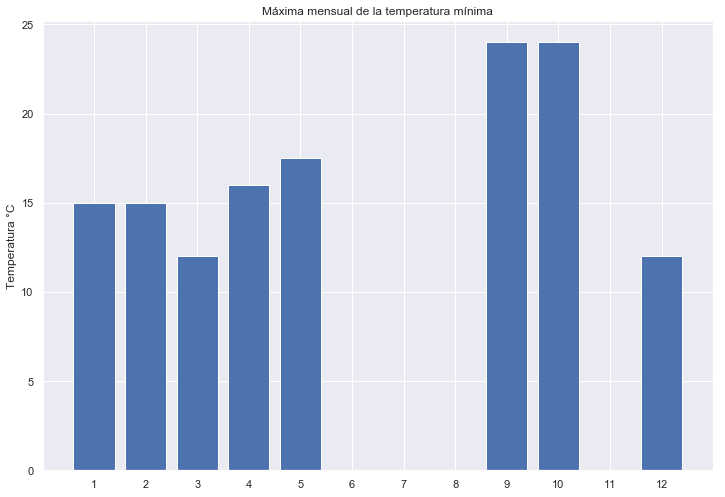

In [46]:
#TNx. La máxima mensual de la temperatura mínima, max(Tmin).
data1=[]
data2=[]
for i in range(0, 12):
    init=1
    count=init + i
    j=df[df.MES==(init+i)].TMIN.max()
    data1.append(count)
    data2.append(j)
df3=pd.DataFrame({"MES" : data1, "maxTMIN" : data2})

x=df3.MES
y=np.arange(len(x))
Tmin=df3.maxTMIN

plt.bar(y, Tmin, align='center')
plt.xticks(y, x)
plt.ylabel('Temperatura °C')
plt.title("Máxima mensual de la temperatura mínima")
plt.show()

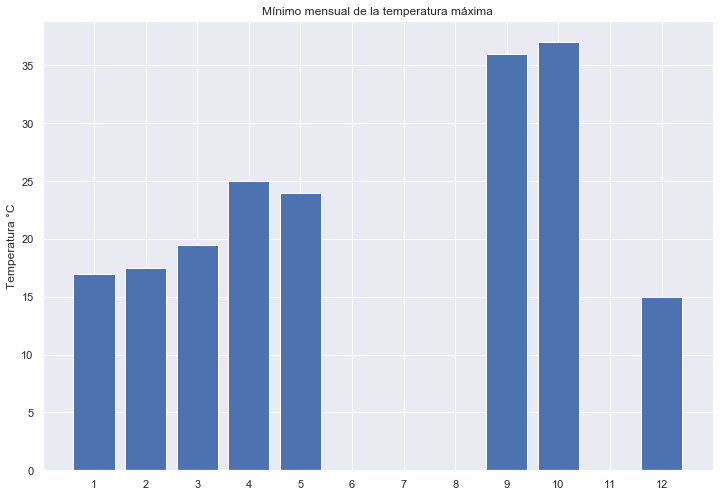

In [47]:
#TXn: El mínimo mensual de la temperatura máxima, min(Tmax).
data1=[]
data2=[]
for i in range(0, 12):
    data1.append((1+i))
    j=df[df.MES==(init+i)].TMAX.min()
    data2.append(j)
df3=pd.DataFrame({ "MES" : data1, "minTMAX" : data2})    
x = df3.MES
y=np.arange(len(x))
minTMAX= df3.minTMAX
 
plt.bar(y, minTMAX, align='center')
plt.xticks(y, x)
plt.ylabel('Temperatura °C')
plt.title("Mínimo mensual de la temperatura máxima")
plt.show()

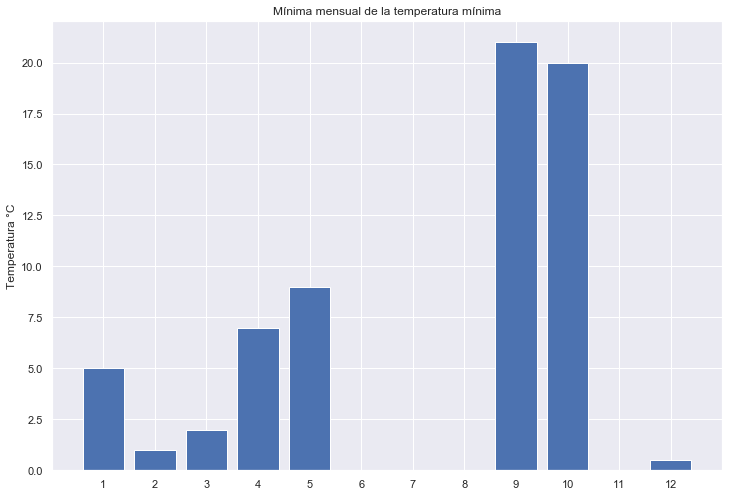

In [48]:
#TNn: El mínimo mensual de la temperatura mínima, min(Tmin).
data1=[]
data2=[]
for i in range(0, 12):
    init=1
    count=init + i
    j=df[df.MES==(init+i)].TMIN.min()
    data1.append(count)
    data2.append(j)
df3=pd.DataFrame({"MES" : data1, "minTMIN" : data2})

x=df3.MES
y=np.arange(len(x))
TMIN=df3.minTMIN

plt.bar(y, TMIN, align='center')
plt.xticks(y, x)
plt.ylabel('Temperatura °C')
plt.title("Mínima mensual de la temperatura mínima")
plt.show()

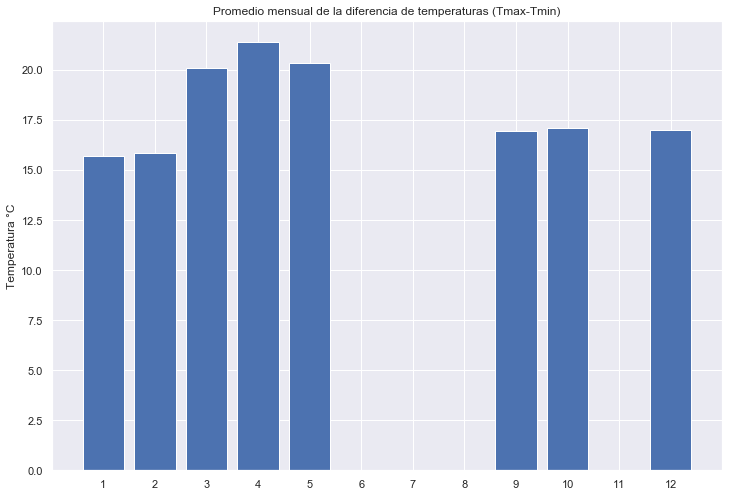

In [49]:
#DTR: El promedio mensual de la diferencia de temperaturas (Tmax-Tmin). 
data1=[]
data2=[]
df2=pd.DataFrame({ 'MES' : df.MES, "DIF" : df.TMAX - df.TMIN})
for i in range(0, 12):
    init=1
    count=init + i
    j=df2[df2.MES==(init+i)].DIF.mean()
    data1.append(count)
    data2.append(j)
df3=pd.DataFrame({"MES" : data1, "PMES" : data2})

x=df3.MES
y=np.arange(len(x))
p=df3.PMES

plt.bar(y, p, align='center')
plt.xticks(y, x)
plt.ylabel('Temperatura °C')
plt.title("Promedio mensual de la diferencia de temperaturas (Tmax-Tmin)")
plt.show()

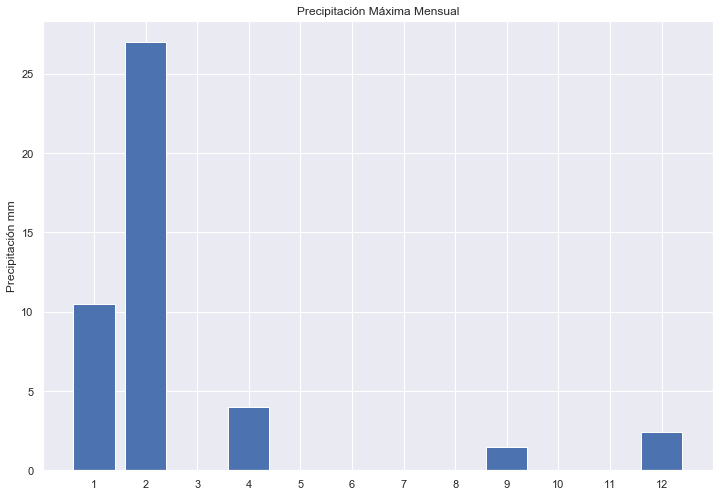

In [50]:
#Rx1day: Precipitación diaria máxima mensual en 1 día.
data1=[]
data2=[]
for i in range(0, 12):
    init=1
    count=init + i
    j=df[df.MES==(init+i)].PRECIP.max()
    data1.append(count)
    data2.append(j)
df3=pd.DataFrame({"MES" : data1, "PRECIP" : data2})

x=df3.MES
y=np.arange(len(x))
p=df3.PRECIP

plt.bar(y, p, align='center')
plt.xticks(y, x)
plt.ylabel('Precipitación mm')
plt.title("Precipitación Máxima Mensual")
plt.show()

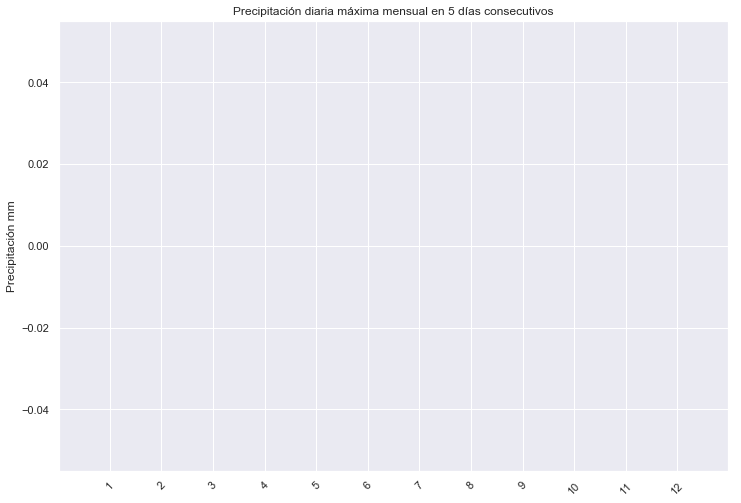

In [45]:
#Rx5 day: Precipitación diaria máxima mensual en 5 días consecutivos.
datos1=[]
datos2=[]
datos3=[]
pmax=[]
count=[]
p=[]
meses=[]

for i in range (0,3):
    df3=pd.DataFrame({"MES" : df[df.YEAR==(1967+i)].MES, "PRECIP" : df[df.YEAR==(1967+i)].PRECIP})
    for j in range (0,12):
        count.append(j+1)
        df4=pd.DataFrame({"PRECIP" : df3[df3.MES==j+1].PRECIP})
        k=len(df4)
        df4.index = np.arange(0,k) 
        for c in range (0,k-5):
            j1=df4.PRECIP[c]
            j2=df4.PRECIP[c+1]
            j3=df4.PRECIP[c+2]
            j4=df4.PRECIP[c+3]
            j5=df4.PRECIP[c+4]
            if (j1 != 0.0 and j2 != 0.0 and j3 != 0.0 and j4 != 0.0 and j5 != 0.0):
                v= j1+j2+j3+j4+j5
                datos2.append(v)    
            else:
                datos2.append(0)
        df5=pd.DataFrame({"P" : datos2})
        s=df5.P.max()
        pmax.append(s)
        datos2=[]
for i in range (0,3):
    for x in range (0,12):
        meses.append(x+1)
df7=pd.DataFrame({"MES" : meses, "P5" : pmax})
meses=[]
count=[]
for i in range(0,12):
    count.append(i+1)
    l=df7[df7.MES==i+1].P5.max()
    meses.append(l)
df8=pd.DataFrame({"MES" : count, "Pmax5" : meses})

x=df8.MES
y=np.arange(len(x))
p=df8.Pmax5

plt.bar(y, p, align='center')
plt.xticks(y, x, rotation=45)
plt.ylabel('Precipitación mm')
plt.title("Precipitación diaria máxima mensual en 5 días consecutivos")
plt.show()

In [52]:
df3=df[df.MES==10].PRECIP
df3.max()

0.0

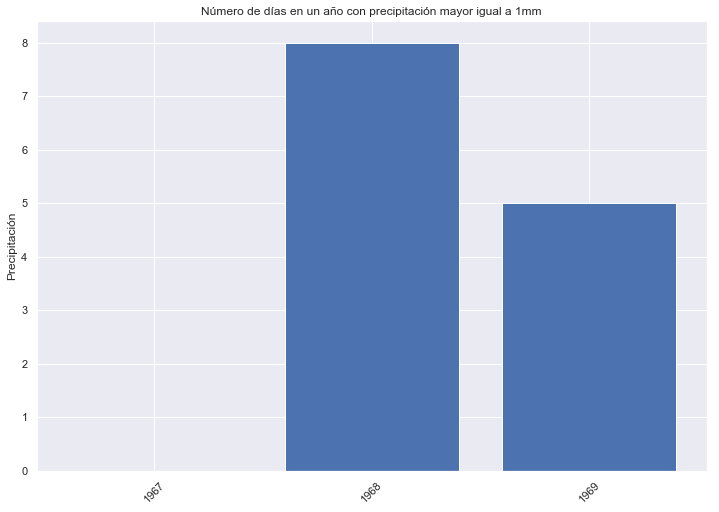

In [53]:
#SDII: Número de días en un año con precipitación mayor igual a 1mm
data1=[]
data2=[]
for i in range(0, 3):
    init=1967
    count=init + i
    j=df[df.YEAR==(1967+i)].PRECIP
    ji=len([1 for i in j if i >= 1])
    data1.append(count)
    data2.append(ji)
df3=pd.DataFrame({"YEAR" : data1, "Precip" : data2})

x=df3.YEAR
y=np.arange(len(x))
p=df3.Precip

plt.bar(y, p, align='center')
plt.xticks(y, x, rotation=45)
plt.ylabel('Precipitación')
plt.title("Número de días en un año con precipitación mayor igual a 1mm")
plt.show()

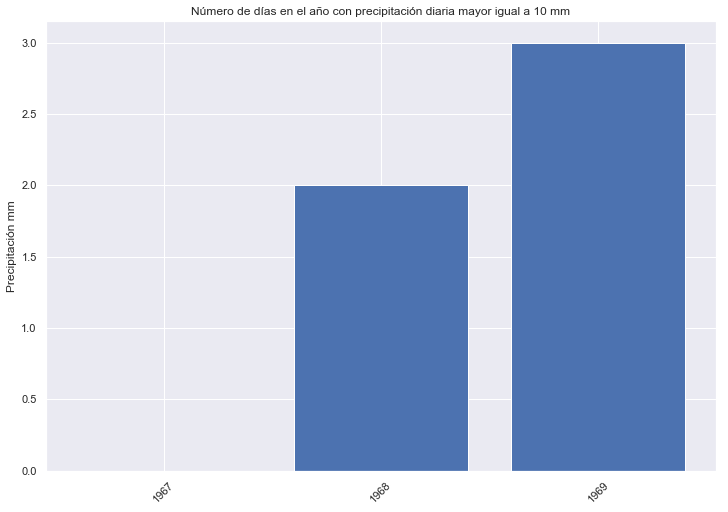

In [54]:
#R10mm: Número de días en el año con precipitación diaria mayor igual a 10 mm.  
data1=[]
data2=[]
for i in range(0, 3):
    init=1967
    count=init + i
    j=df[df.YEAR==(1967+i)].PRECIP
    ji=len([1 for i in j if i >= 10])
    data1.append(count)
    data2.append(ji)
df3=pd.DataFrame({"YEAR" : data1, "Num" : data2})
df3

x=df3.YEAR
y=np.arange(len(x))
p=df3.Num

plt.bar(y, p, align='center')
plt.xticks(y, x, rotation=45)
plt.ylabel('Precipitación mm')
plt.title("Número de días en el año con precipitación diaria mayor igual a 10 mm")
plt.show()

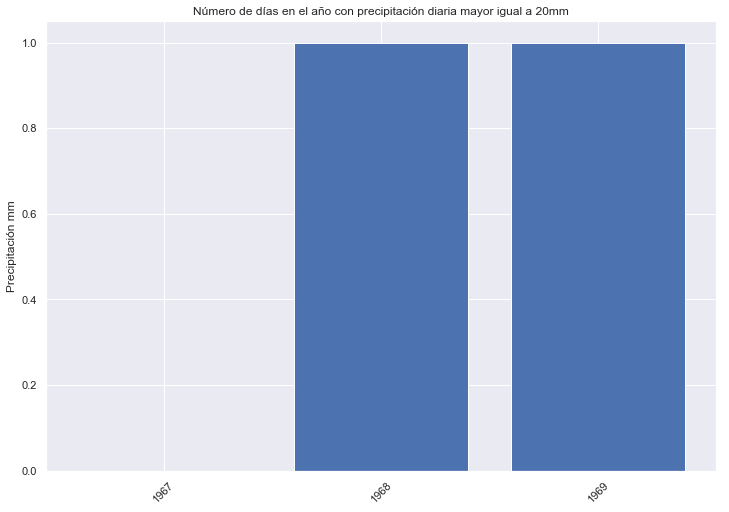

In [55]:
#R20mm: Número de días en el año con precipitación diaria mayor igual a 20mm.
data1=[]
data2=[]
for i in range(0, 3):
    init=1967
    count=init + i
    j=df[df.YEAR==(1967+i)].PRECIP
    ji=len([1 for i in j if i >= 20])
    data1.append(count)
    data2.append(ji)
df3=pd.DataFrame({"YEAR" : data1, "Num" : data2})

x=df3.YEAR
y=np.arange(len(x))
p=df3.Num

plt.bar(y, p, align='center')
plt.xticks(y, x, rotation=45)
plt.ylabel('Precipitación mm')
plt.title("Número de días en el año con precipitación diaria mayor igual a 20mm")
plt.show()

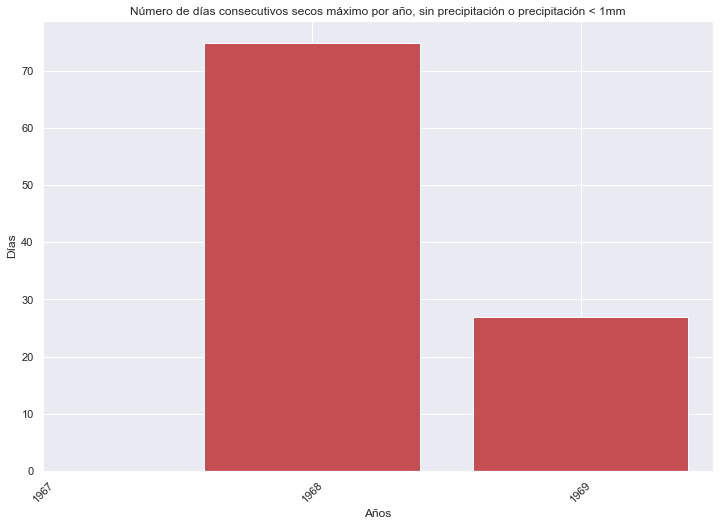

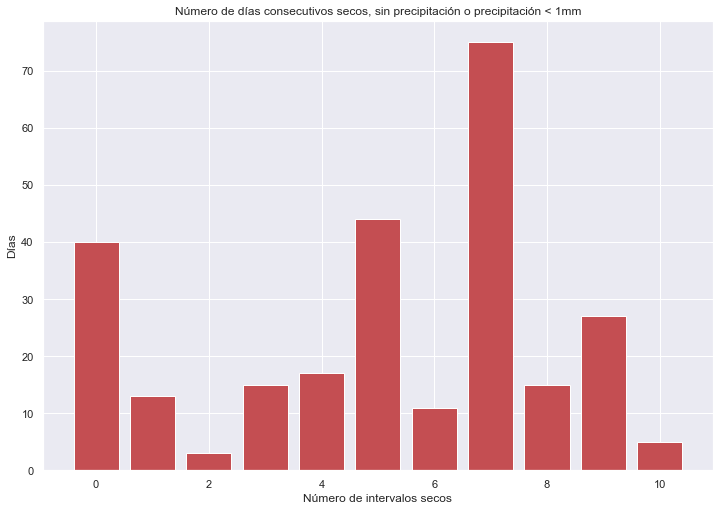

In [56]:
#CDD: Número de días consecutivos secos, sin precipitación o precipitación < 1mm.
datos1=[]
datos2=[]
datos3=[]
count=[]
p=[]
v=c=b=0
for i in range (0,3):
    p.append(1967+i)
    df3=pd.DataFrame({"PRECIP" : df[df.YEAR==1967+i].PRECIP})
    k=len(df3)
    df3.index = np.arange(0,k) 
    for c in range (0,k):
        j1=df3.PRECIP[c]
            
        if (j1 < 1):
            v= v+1
        else:
            b=b+1
            if (v !=0):
                datos1.append(v)
                datos2.append(v)
            v=0
    df4=pd.DataFrame({"P" : datos2})
    f=df4.P.max()
    datos3.append(f)
    datos2=[]
    
    df4=pd.DataFrame({"YEAR" : p, "NOPRECIP" : datos3})

x=df4.YEAR
y=np.arange(len(df4))
p=df4.NOPRECIP

plt.bar(y,p, align='center', color="r")
plt.xticks(y, x, rotation=45)
plt.xlabel("Años")
plt.ylabel('Días')
plt.title("Número de días consecutivos secos máximo por año, sin precipitación o precipitación < 1mm")
plt.show()


df5=pd.DataFrame({"NOPRECIP" : datos1})
for i in range (0, len(df5)):
    count.append(i)
    
df5=pd.DataFrame({"N" : count, "NOPRECIP" : datos1})


x=df5.N
y=np.arange(len(df5))
p=df5.NOPRECIP

plt.bar(y,p, align='center', color="r")
plt.xlabel("Número de intervalos secos")
plt.ylabel('Días')
plt.title("Número de días consecutivos secos, sin precipitación o precipitación < 1mm")
plt.show()

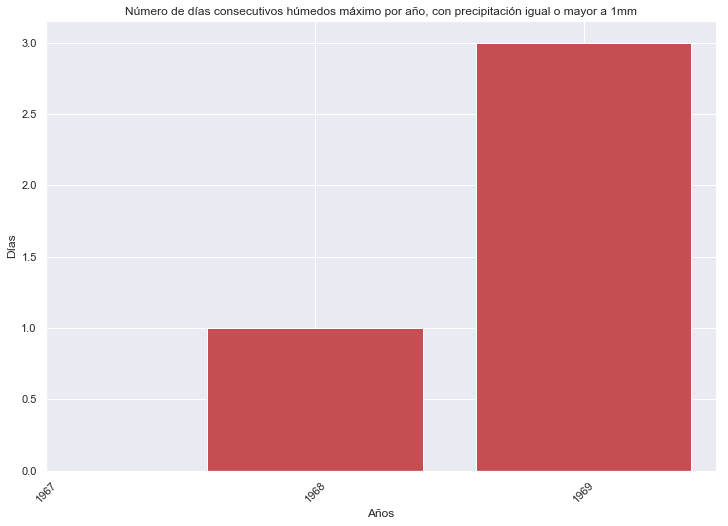

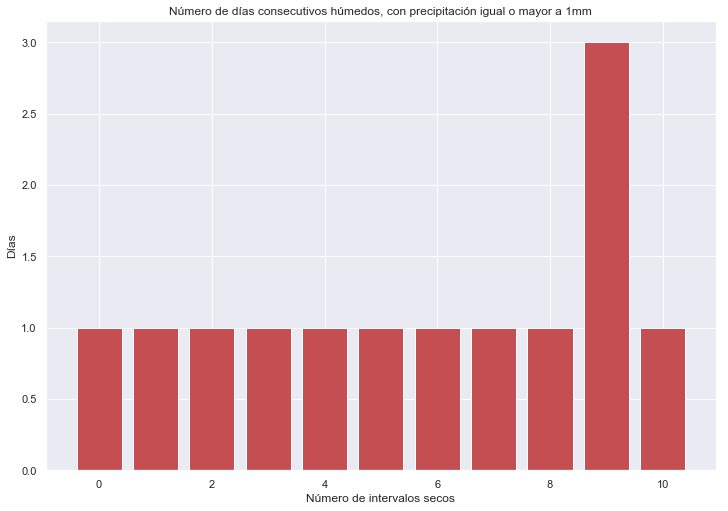

In [57]:
#CWD: Número de días consecutivos húmedos, con precipitación igual o mayor a 1mm. 
datos1=[]
datos2=[]
datos3=[]
count=[]
p=[]
v=c=b=0
for i in range (0,3):
    p.append(1967+i)
    df3=pd.DataFrame({"PRECIP" : df[df.YEAR==1967+i].PRECIP})
    k=len(df3)
    df3.index = np.arange(0,k) 
    for c in range (0,k):
        j1=df3.PRECIP[c]
            
        if (j1 >= 1):
            v= v+1
        else:
            b=b+1
            if (v !=0):
                datos1.append(v)
                datos2.append(v)
            v=0
    df4=pd.DataFrame({"P" : datos2})
    f=df4.P.max()
    datos3.append(f)
    datos2=[]
    
    df4=pd.DataFrame({"YEAR" : p, "NOPRECIP" : datos3})

x=df4.YEAR
y=np.arange(len(df4))
p=df4.NOPRECIP

plt.bar(y,p, align='center', color="r")
plt.xticks(y, x, rotation=45)
plt.xlabel("Años")
plt.ylabel('Días')
plt.title("Número de días consecutivos húmedos máximo por año, con precipitación igual o mayor a 1mm")
plt.show()


df5=pd.DataFrame({"NOPRECIP" : datos1})
for i in range (0, len(df5)):
    count.append(i)
    
df5=pd.DataFrame({"N" : count, "NOPRECIP" : datos1})


x=df5.N
y=np.arange(len(df5))
p=df5.NOPRECIP

plt.bar(y,p, align='center', color="r")
plt.xlabel("Número de intervalos secos")
plt.ylabel('Días')
plt.title("Número de días consecutivos húmedos, con precipitación igual o mayor a 1mm")
plt.show()